#  Machine Learning Project

### Initialize the project notebook, load the dataset into a Pandas DataFrame and perform a quick validation by displaying the data.

In [1]:
import pandas as pd
df = pd.read_csv('datos-autos-85.csv', encoding='latin-1')
df.head(10)

,Simbolización,Pérdidas normalizadas,Marca,Tipo de combustible,Tipo de aspiración,Número de puertas,Tipo de auto,Tracción,Ubicación del motor,Distancia entre ejes,...,Tamaño del motor,Sistema de combustible,Diámetro de cilindro,Carrera del pistón,Índice de compresión,Caballos de fuerza,Rpm pico,MPG en ciudad,MPG en carretera,Precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


### Perform exploratory data analysis (EDA) to understand the dataset structure, including data types, number of observations, unique values per feature and presence of missing values.

In [3]:
print('\n--------------------------------------------------------')
print('Data type and Number of Rows')
print(df.info())

print('\n--------------------------------------------------------')
print('Unique Values')
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print('\n--------------------------------------------------------')
print('d. Null Values')
print(df.isnull().sum())


--------------------------------------------------------
Data type and Number of Rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Simbolización           205 non-null    int64  
 1   Pérdidas normalizadas   164 non-null    float64
 2   Marca                   205 non-null    object 
 3   Tipo de combustible     205 non-null    object 
 4   Tipo de aspiración      205 non-null    object 
 5   Número de puertas       203 non-null    object 
 6   Tipo de auto            205 non-null    object 
 7   Tracción                205 non-null    object 
 8   Ubicación del motor     205 non-null    object 
 9   Distancia entre ejes    205 non-null    float64
 10  Longitud                205 non-null    float64
 11  Ancho                   205 non-null    float64
 12  Alto                    205 non-null    float64
 13  Peso    

### Select the features relevant for car price prediction and create a new DataFrame containing only specific attributes.

In [6]:
df = df [['Pérdidas normalizadas', 'Distancia entre ejes', 'Longitud', 'Ancho', 'Alto', 'Peso', 'Tamaño del motor','Diámetro de cilindro', 'Carrera del pistón', 'Índice de compresión', 'Caballos de fuerza', 'Rpm pico', 'MPG en ciudad', 'MPG en carretera', 'Precio']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pérdidas normalizadas  164 non-null    float64
 1   Distancia entre ejes   205 non-null    float64
 2   Longitud               205 non-null    float64
 3   Ancho                  205 non-null    float64
 4   Alto                   205 non-null    float64
 5   Peso                   205 non-null    int64  
 6   Tamaño del motor       205 non-null    int64  
 7   Diámetro de cilindro   201 non-null    float64
 8   Carrera del pistón     201 non-null    float64
 9   Índice de compresión   205 non-null    float64
 10  Caballos de fuerza     203 non-null    float64
 11  Rpm pico               203 non-null    float64
 12  MPG en ciudad          205 non-null    int64  
 13  MPG en carretera       205 non-null    int64  
 14  Precio                 201 non-null    float64
dtypes: flo

### Standardize missing data representation by replacing records with NaN to ensure proper handling.

In [8]:
df.isna().sum()

Pérdidas normalizadas    41
Distancia entre ejes      0
Longitud                  0
Ancho                     0
Alto                      0
Peso                      0
Tamaño del motor          0
Diámetro de cilindro      4
Carrera del pistón        4
Índice de compresión      0
Caballos de fuerza        2
Rpm pico                  2
MPG en ciudad             0
MPG en carretera          0
Precio                    4
dtype: int64

### Define the price column as the target variable for model training.

In [10]:
cols = ["Pérdidas normalizadas", "Caballos de fuerza", "Rpm pico"]
df[cols] = df[cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pérdidas normalizadas  164 non-null    float64
 1   Distancia entre ejes   205 non-null    float64
 2   Longitud               205 non-null    float64
 3   Ancho                  205 non-null    float64
 4   Alto                   205 non-null    float64
 5   Peso                   205 non-null    int64  
 6   Tamaño del motor       205 non-null    int64  
 7   Diámetro de cilindro   201 non-null    float64
 8   Carrera del pistón     201 non-null    float64
 9   Índice de compresión   205 non-null    float64
 10  Caballos de fuerza     203 non-null    float64
 11  Rpm pico               203 non-null    float64
 12  MPG en ciudad          205 non-null    int64  
 13  MPG en carretera       205 non-null    int64  
 14  Precio                 201 non-null    float64
dtypes: flo

### Identify and quantify missing values across the DataFrame to assess data quality before model training.

<AxesSubplot:>

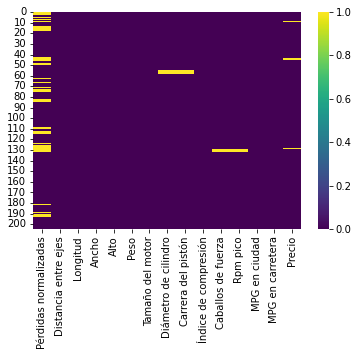

In [14]:
df.isnull().sum()
import seaborn as sns
sns.heatmap(df.isnull(),cmap="viridis")

### Detect records with missing target values (price) and remove them to ensure model training is performed on valid labeled data.

In [15]:
df[df["Precio"].isnull()]

,Pérdidas normalizadas,Distancia entre ejes,Longitud,Ancho,Alto,Peso,Tamaño del motor,Diámetro de cilindro,Carrera del pistón,Índice de compresión,Caballos de fuerza,Rpm pico,MPG en ciudad,MPG en carretera,Precio
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,NaN,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,NaN,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,NaN,98.4,175.7,72.3,50.5,3366,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [16]:
df = df.dropna(subset=["Precio"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pérdidas normalizadas  164 non-null    float64
 1   Distancia entre ejes   201 non-null    float64
 2   Longitud               201 non-null    float64
 3   Ancho                  201 non-null    float64
 4   Alto                   201 non-null    float64
 5   Peso                   201 non-null    int64  
 6   Tamaño del motor       201 non-null    int64  
 7   Diámetro de cilindro   197 non-null    float64
 8   Carrera del pistón     197 non-null    float64
 9   Índice de compresión   201 non-null    float64
 10  Caballos de fuerza     199 non-null    float64
 11  Rpm pico               199 non-null    float64
 12  MPG en ciudad          201 non-null    int64  
 13  MPG en carretera       201 non-null    int64  
 14  Precio                 201 non-null    float64
dtypes: flo

In [17]:
df[df["Precio"].isnull()]

,Pérdidas normalizadas,Distancia entre ejes,Longitud,Ancho,Alto,Peso,Tamaño del motor,Diámetro de cilindro,Carrera del pistón,Índice de compresión,Caballos de fuerza,Rpm pico,MPG en ciudad,MPG en carretera,Precio


### Impute remaining missing values using the dataset mean.

In [18]:
df = df.fillna(df.mean(numeric_only=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pérdidas normalizadas  201 non-null    float64
 1   Distancia entre ejes   201 non-null    float64
 2   Longitud               201 non-null    float64
 3   Ancho                  201 non-null    float64
 4   Alto                   201 non-null    float64
 5   Peso                   201 non-null    int64  
 6   Tamaño del motor       201 non-null    int64  
 7   Diámetro de cilindro   201 non-null    float64
 8   Carrera del pistón     201 non-null    float64
 9   Índice de compresión   201 non-null    float64
 10  Caballos de fuerza     201 non-null    float64
 11  Rpm pico               201 non-null    float64
 12  MPG en ciudad          201 non-null    int64  
 13  MPG en carretera       201 non-null    int64  
 14  Precio                 201 non-null    float64
dtypes: flo

### Normalize feature values to a 0–1 range while excluding the target variable (price) to ensure consistent feature scaling for modeling.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = df.select_dtypes(include=['float64', 'int64']).columns.drop("Precio")
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Pérdidas normalizadas,Distancia entre ejes,Longitud,Ancho,Alto,Peso,Tamaño del motor,Diámetro de cilindro,Carrera del pistón,Índice de compresión,Caballos de fuerza,Rpm pico,MPG en ciudad,MPG en carretera,Precio
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Define a reusable function that splits the dataset into training and test sets based on:
- a given split ratio, returning features and target values for both subsets to support model training and evaluation.

In [20]:
from sklearn.model_selection import train_test_split

def separar_datos(df, porcentaje_test):
    X = df.drop('Precio', axis=1)
    y = df['Precio']
    X_train, X_test, y_train, y_test = train_test_split(
        X,y,
        test_size=porcentaje_test,
        random_state=42
    )
    return X_train, y_train, X_test, y_test

In [22]:
X_train, y_train, X_test, y_test = separar_datos(df, 0.3)

### Define a function that trains and evaluates a K-Nearest Neighbors regression model across a specified range of k values.

In [39]:
k_vecinos = [1, 3, 5, 7, 9]

mse_resultados = {}
mse_resultados = entrenamiento_k(
    k_vecinos,
    X_train, y_train,
    X_test, y_test
)

df_mse = pd.DataFrame(
    list(mse_resultados.items()),
    columns=["k vecinos", "mse"]
)

df_mse["mse"] = df_mse["mse"].round(1)

display(df_mse)

,k vecinos,mse
0,1,13827409.3
1,3,29123320.2
2,5,32349002.4
3,7,37145629.0
4,9,40440238.4


### Define a function that trains and evaluates a K-Nearest Neighbors regression model and returns the Mean Squared Error (MSE) for each feature set to compare model performance.
#### (using different combinations of selected features). 

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def entrenamiento_atributos(X_train, y_train, X_test, y_test, k=1):
    mse_atributos = {}

    combinaciones = {
        "Peso + MPG carretera": ["Peso", "MPG en carretera"],
        "Peso + MPG carretera + MPG ciudad": ["Peso", "MPG en carretera", "MPG en ciudad"],
        "Peso + MPG carretera + MPG ciudad + Ancho": ["Peso", "MPG en carretera", "MPG en ciudad", "Ancho"],
        "Peso + MPG carretera + MPG ciudad + Ancho + Caballos de fuerza":
            ["Peso", "MPG en carretera", "MPG en ciudad", "Ancho", "Caballos de fuerza"]
    }

    for nombre, columnas in combinaciones.items():
        modelo = KNeighborsRegressor(n_neighbors=k)
        modelo.fit(X_train[columnas], y_train)
        y_pred = modelo.predict(X_test[columnas])
        mse_atributos[nombre] = mean_squared_error(y_test, y_pred)

    return mse_atributos


mse_atributos = {}

mse_atributos = entrenamiento_atributos(
    X_train, y_train,
    X_test, y_test,
    k=1
)

df_mse = pd.DataFrame(
    list(mse_atributos.items()),
    columns=["combinaciones", "mse"]
)

df_mse["mse"] = df_mse["mse"].round(1)

display(df_mse)


,combinaciones,mse
0,Peso + MPG carretera,29607817.5
1,Peso + MPG carretera + MPG ciudad,28070314.1
2,Peso + MPG carretera + MPG ciudad + Ancho,15327278.8
3,Peso + MPG carretera + MPG ciudad + Ancho + Ca...,8852163.9


### Define a function that trains a Random Forest regression model and performs a simple train–test validation to evaluate its performance.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def entrenar_random_forest(X_train, y_train, X_test, y_test):
    modelo = RandomForestRegressor(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse1 = mean_squared_error(y_test, y_pred)
    return mse1

### Define a function that trains an XGBoost regression model and performs a simple train–test validation to evaluate its performance.

In [43]:
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def entrenar_xg_boost(X_train, y_train, X_test, y_test):
    modelo = XGBRegressor(
        random_state=42,
        objective="reg:squarederror"
    )
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse2 = mean_squared_error(y_test, y_pred)
    return mse2

     |████████████████████████████████| 2.1 MB 1.5 MB/s eta 0:00:01


In [48]:
import time

umbral = np.median(y_train)
ytr = (y_train >= umbral).astype(int)
yts = (y_test  >= umbral).astype(int)
k = min(mse_resultados, key=mse_resultados.get)

res = []

for name, model in [
    ("KNN", KNeighborsClassifier(n_neighbors=k)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42, eval_metric="logloss"))
]:
    t = time.perf_counter()
    model.fit(X_train, ytr)
    pred = model.predict(X_test)
    res.append([name,
                accuracy_score(yts, pred),
                f1_score(yts, pred),
                time.perf_counter()-t])

resultados = pd.DataFrame(res, columns=["Algoritmo", "Accuracy", "F1 Score", "Tiempo de Entrenamiento"])
display(resultados)


,Algoritmo,Accuracy,F1 Score,Tiempo de Entrenamiento
0,KNN,0.950820,0.947368,0.009395
1,Random Forest,0.950820,0.947368,0.092253
2,XGBoost,0.918033,0.915254,0.036625
